In [88]:
import os
import numpy as np
import pandas as pd
import sqlite3
from sklearn import preprocessing
import json
import requests

In [403]:
c.execute('''select * from matches where season = 2011''')

matches = pd.DataFrame(c.fetchall())
matches.columns = [i[0] for i in c.description]
matches.head()

,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1092,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,A
1,1093,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,A
2,1094,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A
3,1095,D1,2011,2011-11-27,Mainz,Bayern Munich,3,2,H
4,1096,D1,2011,2012-02-18,Freiburg,Bayern Munich,0,0,D


In [663]:
unique_dates = matches.Date.unique()
len(unique_dates)
# print("# of Unique Game Dates in 2011 Season: {}".format(len(unique_dates)))

165

In [664]:
# Div1 = matches[matches['Div']
# all_teams = matches['HomeTeam'].unique()
# print("# of Unique Teams: {}".format(len(all_teams)))
# teams_data = {}
# for team in all_teams:
#     data = {'total_matches_2011': 0, 
#            'total_wins_2011': 0,
#            'total_losses_2011': 0,
#            'rain_wins_2011': 0,
#            'rain_losses_2011': 0,
#            'total_goals_2011': 0}
#     teams_data[team] = data
# print(len(teams_data))

In [707]:
# import json
# import requests
# with open('.secrets/darksky_apikey.json') as f:
#     params = json.load(f)
# # Load secrets from credentials.json
# APIKEY = params['API_Key']
# lat = 52.5200
# long = 13.4050

# url = f'https://api.darksky.net/forecast/{APIKEY}/{lat},{long}, 1315526400?exclude=currently,flags'

# response = requests.get(url=url)
# data = json.loads(response.text)

# print(len(data))
# print(data.keys())
# data
# # weather_data = pd.DataFrame('data')

6
dict_keys(['latitude', 'longitude', 'timezone', 'hourly', 'daily', 'offset'])


{'latitude': 52.52,
 'longitude': 13.405,
 'timezone': 'Europe/Berlin',
 'hourly': {'summary': 'Possible drizzle until night, starting again in the afternoon.',
  'icon': 'rain',
  'data': [{'time': 1315519200,
    'summary': 'Partly Cloudy',
    'icon': 'partly-cloudy-night',
    'precipIntensity': 0,
    'precipProbability': 0,
    'temperature': 53.63,
    'apparentTemperature': 53.63,
    'dewPoint': 51.79,
    'humidity': 0.93,
    'windSpeed': 9.21,
    'windGust': 9.21,
    'windBearing': 278,
    'cloudCover': 0.44,
    'uvIndex': 0,
    'visibility': 6.216},
   {'time': 1315522800,
    'summary': 'Mostly Cloudy',
    'icon': 'partly-cloudy-night',
    'precipIntensity': 0,
    'precipProbability': 0,
    'temperature': 53.63,
    'apparentTemperature': 53.63,
    'dewPoint': 51.85,
    'humidity': 0.94,
    'windSpeed': 9.21,
    'windGust': 9.21,
    'windBearing': 270,
    'cloudCover': 0.61,
    'uvIndex': 0,
    'visibility': 6.216},
   {'time': 1315526400,
    'summary': 

In [692]:
# data['daily']['data'][0]['icon']

KeyError: 'daily'

# Getting weather data 
## using season2011_df date feature

In [79]:
season2011_df['New_date'] = season2011_df['Date'].apply(pd.Timestamp)

/anaconda3/envs/learn-env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [80]:
season2011_df['New_date'] = pd.DatetimeIndex(season2011_df['New_date']).astype(np.int64)/10**9

/anaconda3/envs/learn-env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [81]:
times = season2011_df.New_date.astype(int)
print(len(times))
times.head()

306


204    1312675200
205    1313193600
206    1313798400
207    1314403200
208    1315612800
Name: New_date, dtype: int64

In [236]:
times[:5]

204    1312675200
205    1313193600
206    1313798400
207    1314403200
208    1315612800
Name: New_date, dtype: int64

In [665]:
# wheather_df1.loc[wheather_df1['New_date'] == 1312675200]

In [89]:
def get_rain(times):
    

    with open('.secrets/darksky_apikey.json') as f:
        params = json.load(f)
    # Load secrets from credentials.json
    APIKEY = params['API_Key']
    lat = 52.5200
    long = 13.4050
    
    output = []
    for time in times[:306]:
        url = f'https://api.darksky.net/forecast/{APIKEY}/{lat},{long},{time}?exclude=currently,flags'

        dict_keys = ['icon', 'time']
        response = requests.get(url=url)
        data = json.loads(response.text)['daily']['data'][0]
        
        data = {k : data[k] for k in dict_keys}
        output.append(data)

    return output

In [91]:
# weather_df = pd.DataFrame()
whether_df = pd.DataFrame(get_rain(times))

In [92]:
whether_df.head()

,icon,time
0,rain,1312668000
1,partly-cloudy-day,1313186400
2,clear-day,1313791200
3,rain,1314396000
4,rain,1315605600


In [706]:
print(data.keys())
data['daily']['data'][0]

dict_keys(['code', 'error'])


KeyError: 'daily'

In [9]:
connection = sqlite3.connect("database.sqlite")
c = connection.cursor()
bundesliga = pd.read_sql_query("SELECT * FROM FlatView_Advanced", connection)

# c.close()
# connection.close()

CONTRIBUTING.md    Mod2_project.ipynb database.sqlite
LICENSE.md         README.md          index.ipynb


In [10]:
# bundesliga11 = pd.read_sql_query("SELECT * FROM table", connection)
# bundesliga11  

In [12]:
c.execute("""
            SELECT *
            FROM Matches

                """)
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
df.head()


,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1,D2,2009,2010-04-04,Oberhausen,Kaiserslautern,2,1,H
1,2,D2,2009,2009-11-01,Munich 1860,Kaiserslautern,0,1,A
2,3,D2,2009,2009-10-04,Frankfurt FSV,Kaiserslautern,1,1,D
3,4,D2,2009,2010-02-21,Frankfurt FSV,Karlsruhe,2,1,H
4,5,D2,2009,2009-12-06,Ahlen,Karlsruhe,1,3,A


In [13]:
c.execute("""
            SELECT *
            FROM sqlite_sequence

                """)
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
df.head()


,name,seq
0,Matches,46774
1,Unique_Teams,128


In [14]:
c.execute("""
            SELECT *
            FROM Teams

                """)
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
df.head()


,Season,TeamName,KaderHome,AvgAgeHome,ForeignPlayersHome,OverallMarketValueHome,AvgMarketValueHome,StadiumCapacity
0,2017,Bayern Munich,27,26,15,597950000,22150000,75000
1,2017,Dortmund,33,25,18,416730000,12630000,81359
2,2017,Leverkusen,31,24,15,222600000,7180000,30210
3,2017,RB Leipzig,30,23,15,180130000,6000000,42959
4,2017,Schalke 04,29,24,17,179550000,6190000,62271


In [15]:
c.execute("""
            SELECT *
            FROM Teams_in_Matches
            
                """)
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
print(len(df))
df.head()


49148


,Match_ID,Unique_Team_ID
0,1,26
1,1,46
2,2,26
3,2,42
4,3,26


In [16]:
c.execute("""
            SELECT *
            FROM Unique_Teams

                """)
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
df.head()


,TeamName,Unique_Team_ID
0,Bayern Munich,1
1,Dortmund,2
2,Leverkusen,3
3,RB Leipzig,4
4,Schalke 04,5


In [17]:
c.execute("""
            SELECT distinct TeamName
            FROM Teams

                """)
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]

print(len(df))
df.head()

57


,TeamName
0,Bayern Munich
1,Dortmund
2,Leverkusen
3,RB Leipzig
4,Schalke 04


In [18]:
# q1 The Name of the Team in Germany
c.execute("""
            SELECT distinct TeamName
            FROM Unique_Teams

                """)
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
print(len(df))
df.head()

128


,TeamName
0,Bayern Munich
1,Dortmund
2,Leverkusen
3,RB Leipzig
4,Schalke 04


In [19]:
## joining tables
c.execute("""
            SELECT *
            FROM Matches m
            JOIN Teams_in_Matches USING(Match_ID)
            JOIN Unique_Teams USING(Unique_Team_ID)
            JOIN Teams Using(TeamName)
            
                """)
df = pd.DataFrame(c.fetchall())
df.columns = [x[0] for x in c.description]
print(len(df))
df.head()

301275


,Match_ID,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,Unique_Team_ID,TeamName,Season,KaderHome,AvgAgeHome,ForeignPlayersHome,OverallMarketValueHome,AvgMarketValueHome,StadiumCapacity
0,1,D2,2009,2010-04-04,Oberhausen,Kaiserslautern,2,1,H,26,Kaiserslautern,2005,32,25,14,23230000,726000,49780
1,1,D2,2009,2010-04-04,Oberhausen,Kaiserslautern,2,1,H,26,Kaiserslautern,2006,32,23,16,24650000,770000,47728
2,1,D2,2009,2010-04-04,Oberhausen,Kaiserslautern,2,1,H,26,Kaiserslautern,2007,32,23,16,21180000,662000,47728
3,1,D2,2009,2010-04-04,Oberhausen,Kaiserslautern,2,1,H,26,Kaiserslautern,2008,33,23,12,18750000,568000,47728
4,1,D2,2009,2010-04-04,Oberhausen,Kaiserslautern,2,1,H,26,Kaiserslautern,2009,32,23,13,23900000,747000,47728


In [20]:
bundesliga

,Match_ID,Unique_Team_ID,Unique_Team,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,KaderHome,AvgAgeHome,ForeignPlayersHome,OverallMarketValueHome,AvgMarketValueHome,StadiumCapacity
0,5772,1,Bayern Munich,D1,2005,2005-08-05,Bayern Munich,M'gladbach,3,0,H,25,27,14,171500000,6860000,75000
1,5378,1,Bayern Munich,D1,2005,2005-08-13,Leverkusen,Bayern Munich,2,5,A,25,27,14,171500000,6860000,75000
2,5693,1,Bayern Munich,D1,2005,2005-08-27,Bayern Munich,Hertha,3,0,H,25,27,14,171500000,6860000,75000
3,5386,1,Bayern Munich,D1,2005,2005-09-10,Nurnberg,Bayern Munich,1,2,A,25,27,14,171500000,6860000,75000
4,5661,1,Bayern Munich,D1,2005,2005-09-17,Bayern Munich,Hannover,1,0,H,25,27,14,171500000,6860000,75000
5,5377,1,Bayern Munich,D1,2005,2005-09-20,Ein Frankfurt,Bayern Munich,0,1,A,25,27,14,171500000,6860000,75000
6,5383,1,Bayern Munich,D1,2005,2005-09-24,Hamburg,Bayern Munich,2,0,H,25,27,14,171500000,6860000,75000
7,5763,1,Bayern Munich,D1,2005,2005-10-01,Bayern Munich,Wolfsburg,2,0,H,25,27,14,171500000,6860000,75000
8,5384,1,Bayern Munich,D1,2005,2005-10-15,Schalke 04,Bayern Munich,1,1,D,25,27,14,171500000,6860000,75000
9,5432,1,Bayern Munich,D1,2005,2005-10-22,Bayern Munich,Duisburg,4,0,H,25,27,14,171500000,6860000,75000


# The name of the Team

In [21]:
print(bundesliga.Unique_Team.nunique())
bundesliga.Unique_Team.unique()

57


array(['Bayern Munich', 'Dortmund', 'Leverkusen', 'RB Leipzig',
       'Schalke 04', "M'gladbach", 'Wolfsburg', 'FC Koln', 'Hoffenheim',
       'Hertha', 'Mainz', 'Hamburg', 'Werder Bremen', 'Ein Frankfurt',
       'Augsburg', 'Freiburg', 'Stuttgart', 'Hannover', 'Ingolstadt',
       'Darmstadt', 'Paderborn', 'Nurnberg', 'Braunschweig',
       'Greuther Furth', 'Fortuna Dusseldorf', 'Kaiserslautern',
       'St Pauli', 'Bochum', 'Karlsruhe', 'Bielefeld', 'Cottbus',
       'Duisburg', 'Hansa Rostock', 'Aachen', 'Union Berlin',
       'Heidenheim', 'Dresden', 'Sandhausen', 'Erzgebirge Aue', 'Kiel',
       'Regensburg', 'Munich 1860', 'Wurzburger Kickers', 'Frankfurt FSV',
       'Aalen', 'Oberhausen', 'Osnabruck', 'Koblenz', 'Ahlen', 'Wehen',
       'CZ Jena', 'Offenbach', 'Burghausen', 'Unterhaching',
       'Saarbrucken', 'Siegen', 'RW Essen'], dtype=object)

In [22]:
def get_goals(record):
    """return the FTHG of the unique team if the team played at home.
        Otherwise return FTAG"""
    if record['Unique_Team'] == record['HomeTeam']:
        return record['FTHG']
    else:
        return record['FTAG']

In [23]:
bundesliga['count_goal'] = bundesliga.apply(get_goals, axis=1)
bundesliga.head()

,Match_ID,Unique_Team_ID,Unique_Team,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,KaderHome,AvgAgeHome,ForeignPlayersHome,OverallMarketValueHome,AvgMarketValueHome,StadiumCapacity,count_goal
0,5772,1,Bayern Munich,D1,2005,2005-08-05,Bayern Munich,M'gladbach,3,0,H,25,27,14,171500000,6860000,75000,3
1,5378,1,Bayern Munich,D1,2005,2005-08-13,Leverkusen,Bayern Munich,2,5,A,25,27,14,171500000,6860000,75000,5
2,5693,1,Bayern Munich,D1,2005,2005-08-27,Bayern Munich,Hertha,3,0,H,25,27,14,171500000,6860000,75000,3
3,5386,1,Bayern Munich,D1,2005,2005-09-10,Nurnberg,Bayern Munich,1,2,A,25,27,14,171500000,6860000,75000,2
4,5661,1,Bayern Munich,D1,2005,2005-09-17,Bayern Munich,Hannover,1,0,H,25,27,14,171500000,6860000,75000,1


In [24]:
# filtering season 2011 & Division D1 
season2011 = bundesliga.loc[(bundesliga['Season'] == "2011") & (bundesliga['Div'] == "D1")]
season2011.head()

,Match_ID,Unique_Team_ID,Unique_Team,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,KaderHome,AvgAgeHome,ForeignPlayersHome,OverallMarketValueHome,AvgMarketValueHome,StadiumCapacity,count_goal
204,1491,1,Bayern Munich,D1,2011,2011-08-07,Bayern Munich,M'gladbach,0,1,A,24,25,11,335600000,13980000,75000,0
205,1094,1,Bayern Munich,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A,24,25,11,335600000,13980000,75000,1
206,1211,1,Bayern Munich,D1,2011,2011-08-20,Bayern Munich,Hamburg,5,0,H,24,25,11,335600000,13980000,75000,5
207,1104,1,Bayern Munich,D1,2011,2011-08-27,Kaiserslautern,Bayern Munich,0,3,A,24,25,11,335600000,13980000,75000,3
208,1197,1,Bayern Munich,D1,2011,2011-09-10,Bayern Munich,Freiburg,7,0,H,24,25,11,335600000,13980000,75000,7


In [25]:
season2011.shape

(612, 18)

In [378]:
# checking count of games played per team **league has 34 games for each team
season2011.Unique_Team.value_counts()

Schalke 04        34
Leverkusen        34
Bayern Munich     34
Werder Bremen     34
Dortmund          34
Hannover          34
M'gladbach        34
Freiburg          34
FC Koln           34
Nurnberg          34
Kaiserslautern    34
Hoffenheim        34
Wolfsburg         34
Hertha            34
Mainz             34
Augsburg          34
Hamburg           34
Stuttgart         34
Name: Unique_Team, dtype: int64

In [411]:
season2011.loc[season2011['Unique_Team']=="Stuttgart"]

,Match_ID,Unique_Team_ID,Unique_Team,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,KaderHome,AvgAgeHome,ForeignPlayersHome,OverallMarketValueHome,AvgMarketValueHome,StadiumCapacity,count_goal,New_date,TeamAndMatchID
6859,1311,17,Stuttgart,D1,2011,2011-08-06,Stuttgart,Schalke 04,3,0,H,32,24,18,101880000,3180000,60449,3,1.312589e+09,1311_17
6860,1325,17,Stuttgart,D1,2011,2011-08-13,M'gladbach,Stuttgart,1,1,D,32,24,18,101880000,3180000,60449,1,1.313194e+09,1325_17
6861,1278,17,Stuttgart,D1,2011,2011-08-20,Stuttgart,Leverkusen,0,1,A,32,24,18,101880000,3180000,60449,0,1.313798e+09,1278_17
6862,1316,17,Stuttgart,D1,2011,2011-08-26,Hertha,Stuttgart,1,0,H,32,24,18,101880000,3180000,60449,0,1.314317e+09,1316_17
6863,1379,17,Stuttgart,D1,2011,2011-09-10,Stuttgart,Hannover,3,0,H,32,24,18,101880000,3180000,60449,3,1.315613e+09,1379_17
6864,1327,17,Stuttgart,D1,2011,2011-09-16,Freiburg,Stuttgart,1,2,A,32,24,18,101880000,3180000,60449,2,1.316131e+09,1327_17
6865,1224,17,Stuttgart,D1,2011,2011-09-23,Stuttgart,Hamburg,1,2,A,32,24,18,101880000,3180000,60449,1,1.316736e+09,1224_17
6866,1319,17,Stuttgart,D1,2011,2011-09-30,Kaiserslautern,Stuttgart,0,2,A,32,24,18,101880000,3180000,60449,2,1.317341e+09,1319_17
6867,1641,17,Stuttgart,D1,2011,2011-10-15,Stuttgart,Hoffenheim,2,0,H,32,24,18,101880000,3180000,60449,2,1.318637e+09,1641_17
6868,1320,17,Stuttgart,D1,2011,2011-10-22,Nurnberg,Stuttgart,2,2,D,32,24,18,101880000,3180000,60449,2,1.319242e+09,1320_17


In [385]:
season2011['TeamAndMatchID'] = season2011.Match_ID.astype(str) + "_" + season2011.Unique_Team_ID.astype(str)
# goals_df = season2011.groupby('Unique_Team')['count_goal'].agg('sum').sort_values(ascending=False) 

/anaconda3/envs/learn-env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [390]:
print(season2011.shape)
season2011

(612, 20)


,Match_ID,Unique_Team_ID,Unique_Team,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,KaderHome,AvgAgeHome,ForeignPlayersHome,OverallMarketValueHome,AvgMarketValueHome,StadiumCapacity,count_goal,New_date,TeamAndMatchID
204,1491,1,Bayern Munich,D1,2011,2011-08-07,Bayern Munich,M'gladbach,0,1,A,24,25,11,335600000,13980000,75000,0,1.312675e+09,1491_1
205,1094,1,Bayern Munich,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A,24,25,11,335600000,13980000,75000,1,1.313194e+09,1094_1
206,1211,1,Bayern Munich,D1,2011,2011-08-20,Bayern Munich,Hamburg,5,0,H,24,25,11,335600000,13980000,75000,5,1.313798e+09,1211_1
207,1104,1,Bayern Munich,D1,2011,2011-08-27,Kaiserslautern,Bayern Munich,0,3,A,24,25,11,335600000,13980000,75000,3,1.314403e+09,1104_1
208,1197,1,Bayern Munich,D1,2011,2011-09-10,Bayern Munich,Freiburg,7,0,H,24,25,11,335600000,13980000,75000,7,1.315613e+09,1197_1
209,1100,1,Bayern Munich,D1,2011,2011-09-18,Schalke 04,Bayern Munich,0,2,A,24,25,11,335600000,13980000,75000,2,1.316304e+09,1100_1
210,1262,1,Bayern Munich,D1,2011,2011-09-24,Bayern Munich,Leverkusen,3,0,H,24,25,11,335600000,13980000,75000,3,1.316822e+09,1262_1
211,1102,1,Bayern Munich,D1,2011,2011-10-01,Hoffenheim,Bayern Munich,0,0,D,24,25,11,335600000,13980000,75000,0,1.317427e+09,1102_1
212,1401,1,Bayern Munich,D1,2011,2011-10-15,Bayern Munich,Hertha,4,0,H,24,25,11,335600000,13980000,75000,4,1.318637e+09,1401_1
213,1101,1,Bayern Munich,D1,2011,2011-10-23,Hannover,Bayern Munich,2,1,H,24,25,11,335600000,13980000,75000,1,1.319328e+09,1101_1


In [407]:
#drop duplicate by Match_ID
season2011_df = season2011.drop_duplicates(subset='TeamAndMatchID', keep="first")

In [408]:
season2011_df.shape

(612, 20)

In [410]:
season2011_df.loc[season2011_df['Match_ID'] == 1278]

,Match_ID,Unique_Team_ID,Unique_Team,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,KaderHome,AvgAgeHome,ForeignPlayersHome,OverallMarketValueHome,AvgMarketValueHome,StadiumCapacity,count_goal,New_date,TeamAndMatchID
1090,1278,3,Leverkusen,D1,2011,2011-08-20,Stuttgart,Leverkusen,0,1,A,29,23,9,151100000,5210000,30210,1,1.313798e+09,1278_3
6861,1278,17,Stuttgart,D1,2011,2011-08-20,Stuttgart,Leverkusen,0,1,A,32,24,18,101880000,3180000,60449,0,1.313798e+09,1278_17


In [393]:
season2011_df.groupby('Unique_Team').sum().head()

,Match_ID,Unique_Team_ID,FTHG,FTAG,count_goal,New_date
Unique_Team,,,,,,
Augsburg,50056,510,50,35,36,4.505328e+10
Bayern Munich,41598,34,65,34,77,4.505337e+10
Dortmund,41888,68,57,48,80,4.505302e+10
FC Koln,42992,272,66,48,39,4.505561e+10
Freiburg,43279,544,65,41,45,4.505302e+10


In [394]:
print(season2011_df.Unique_Team.nunique())
season2011_df.Unique_Team.unique()

18


array(['Bayern Munich', 'Dortmund', 'Leverkusen', 'Schalke 04',
       "M'gladbach", 'Wolfsburg', 'FC Koln', 'Hoffenheim', 'Hertha',
       'Mainz', 'Hamburg', 'Werder Bremen', 'Augsburg', 'Freiburg',
       'Stuttgart', 'Hannover', 'Nurnberg', 'Kaiserslautern'],
      dtype=object)

# The toal number of goals scored by the team during the 2011 season

In [395]:
season2011_df

,Match_ID,Unique_Team_ID,Unique_Team,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,KaderHome,AvgAgeHome,ForeignPlayersHome,OverallMarketValueHome,AvgMarketValueHome,StadiumCapacity,count_goal,New_date,TeamAndMatchID
204,1491,1,Bayern Munich,D1,2011,2011-08-07,Bayern Munich,M'gladbach,0,1,A,24,25,11,335600000,13980000,75000,0,1.312675e+09,1491_1
205,1094,1,Bayern Munich,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,A,24,25,11,335600000,13980000,75000,1,1.313194e+09,1094_1
206,1211,1,Bayern Munich,D1,2011,2011-08-20,Bayern Munich,Hamburg,5,0,H,24,25,11,335600000,13980000,75000,5,1.313798e+09,1211_1
207,1104,1,Bayern Munich,D1,2011,2011-08-27,Kaiserslautern,Bayern Munich,0,3,A,24,25,11,335600000,13980000,75000,3,1.314403e+09,1104_1
208,1197,1,Bayern Munich,D1,2011,2011-09-10,Bayern Munich,Freiburg,7,0,H,24,25,11,335600000,13980000,75000,7,1.315613e+09,1197_1
209,1100,1,Bayern Munich,D1,2011,2011-09-18,Schalke 04,Bayern Munich,0,2,A,24,25,11,335600000,13980000,75000,2,1.316304e+09,1100_1
210,1262,1,Bayern Munich,D1,2011,2011-09-24,Bayern Munich,Leverkusen,3,0,H,24,25,11,335600000,13980000,75000,3,1.316822e+09,1262_1
211,1102,1,Bayern Munich,D1,2011,2011-10-01,Hoffenheim,Bayern Munich,0,0,D,24,25,11,335600000,13980000,75000,0,1.317427e+09,1102_1
212,1401,1,Bayern Munich,D1,2011,2011-10-15,Bayern Munich,Hertha,4,0,H,24,25,11,335600000,13980000,75000,4,1.318637e+09,1401_1
213,1101,1,Bayern Munich,D1,2011,2011-10-23,Hannover,Bayern Munich,2,1,H,24,25,11,335600000,13980000,75000,1,1.319328e+09,1101_1


In [396]:
# sum rows in pandas datafram which match a column value
season2011_df.groupby('Unique_Team')['count_goal'].agg('sum').sort_values(ascending=False) 

Unique_Team
Dortmund          80
Bayern Munich     77
Schalke 04        74
Stuttgart         63
Leverkusen        52
M'gladbach        49
Werder Bremen     49
Wolfsburg         47
Mainz             47
Freiburg          45
Hannover          41
Hoffenheim        41
FC Koln           39
Hertha            38
Nurnberg          38
Augsburg          36
Hamburg           35
Kaiserslautern    24
Name: count_goal, dtype: int64

# The total number of wins the team earned during

In [412]:
def win_team(record):
    """return the HomeTeam if FTHG > FTAG 
        Otherwise return AwayTeam"""
    if record['FTHG'] > record['FTAG']:
        return record['HomeTeam']
    elif record['FTHG'] < record['FTAG']:
        return record['AwayTeam']


In [ ]:
# def win_team2(record):
#     if record['Unique_Team'] == record['HomeTeam']:
#         if record['FTHG'] > record['FTAG']:
#             return record['HomeTeam']

In [413]:
season2011_df['WinnerInMatch'] = season2011_df.apply(win_team, axis=1)
season2011_df

,Match_ID,Unique_Team_ID,Unique_Team,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,...,KaderHome,AvgAgeHome,ForeignPlayersHome,OverallMarketValueHome,AvgMarketValueHome,StadiumCapacity,count_goal,New_date,TeamAndMatchID,WinnerInMatch
204,1491,1,Bayern Munich,D1,2011,2011-08-07,Bayern Munich,M'gladbach,0,1,...,24,25,11,335600000,13980000,75000,0,1.312675e+09,1491_1,M'gladbach
205,1094,1,Bayern Munich,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,...,24,25,11,335600000,13980000,75000,1,1.313194e+09,1094_1,Bayern Munich
206,1211,1,Bayern Munich,D1,2011,2011-08-20,Bayern Munich,Hamburg,5,0,...,24,25,11,335600000,13980000,75000,5,1.313798e+09,1211_1,Bayern Munich
207,1104,1,Bayern Munich,D1,2011,2011-08-27,Kaiserslautern,Bayern Munich,0,3,...,24,25,11,335600000,13980000,75000,3,1.314403e+09,1104_1,Bayern Munich
208,1197,1,Bayern Munich,D1,2011,2011-09-10,Bayern Munich,Freiburg,7,0,...,24,25,11,335600000,13980000,75000,7,1.315613e+09,1197_1,Bayern Munich
209,1100,1,Bayern Munich,D1,2011,2011-09-18,Schalke 04,Bayern Munich,0,2,...,24,25,11,335600000,13980000,75000,2,1.316304e+09,1100_1,Bayern Munich
210,1262,1,Bayern Munich,D1,2011,2011-09-24,Bayern Munich,Leverkusen,3,0,...,24,25,11,335600000,13980000,75000,3,1.316822e+09,1262_1,Bayern Munich
211,1102,1,Bayern Munich,D1,2011,2011-10-01,Hoffenheim,Bayern Munich,0,0,...,24,25,11,335600000,13980000,75000,0,1.317427e+09,1102_1,None
212,1401,1,Bayern Munich,D1,2011,2011-10-15,Bayern Munich,Hertha,4,0,...,24,25,11,335600000,13980000,75000,4,1.318637e+09,1401_1,Bayern Munich
213,1101,1,Bayern Munich,D1,2011,2011-10-23,Hannover,Bayern Munich,2,1,...,24,25,11,335600000,13980000,75000,1,1.319328e+09,1101_1,Hannover


In [399]:
season2011_df.WinnerInMatch.value_counts().head()
winner_2011 = season2011_df.WinnerInMatch.value_counts()
winner_2011.head()

Dortmund         50
Bayern Munich    46
Schalke 04       40
M'gladbach       34
Leverkusen       30
Name: WinnerInMatch, dtype: int64

# Trying  to figure out duplicates

In [430]:
# 15win 11 loses 8 draw
Stuttgart = season2011_df.loc[season2011_df['Unique_Team']=="Stuttgart"]
print(Stuttgart.WinnerInMatch.value_counts())
Stuttgart.head()

Stuttgart        15
Bayern Munich     2
M'gladbach        1
Hertha            1
Leverkusen        1
Schalke 04        1
Wolfsburg         1
Hamburg           1
Hannover          1
Werder Bremen     1
Mainz             1
Name: WinnerInMatch, dtype: int64


,Match_ID,Unique_Team_ID,Unique_Team,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,...,KaderHome,AvgAgeHome,ForeignPlayersHome,OverallMarketValueHome,AvgMarketValueHome,StadiumCapacity,count_goal,New_date,TeamAndMatchID,WinnerInMatch
6859,1311,17,Stuttgart,D1,2011,2011-08-06,Stuttgart,Schalke 04,3,0,...,32,24,18,101880000,3180000,60449,3,1.312589e+09,1311_17,Stuttgart
6860,1325,17,Stuttgart,D1,2011,2011-08-13,M'gladbach,Stuttgart,1,1,...,32,24,18,101880000,3180000,60449,1,1.313194e+09,1325_17,None
6861,1278,17,Stuttgart,D1,2011,2011-08-20,Stuttgart,Leverkusen,0,1,...,32,24,18,101880000,3180000,60449,0,1.313798e+09,1278_17,Leverkusen
6862,1316,17,Stuttgart,D1,2011,2011-08-26,Hertha,Stuttgart,1,0,...,32,24,18,101880000,3180000,60449,0,1.314317e+09,1316_17,Hertha
6863,1379,17,Stuttgart,D1,2011,2011-09-10,Stuttgart,Hannover,3,0,...,32,24,18,101880000,3180000,60449,3,1.315613e+09,1379_17,Stuttgart


In [488]:
## creating function that only counts wins when features Unique_team == WinnerInMatch
def count_wins(record):
    if record['Unique_Team'] == record['WinnerInMatch']:
        return record['WinnerInMatch']

In [489]:
season2011_df['Unique_winner'] = season2011_df.apply(count_wins, axis=1)

In [490]:
season2011_df

,Match_ID,Unique_Team_ID,Unique_Team,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,...,OverallMarketValueHome,AvgMarketValueHome,StadiumCapacity,count_goal,New_date,TeamAndMatchID,WinnerInMatch,Unique_winner,Unique_Draw,Unique_draw
204,1491,1,Bayern Munich,D1,2011,2011-08-07,Bayern Munich,M'gladbach,0,1,...,335600000,13980000,75000,0,1.312675e+09,1491_1,M'gladbach,None,None,None
205,1094,1,Bayern Munich,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,...,335600000,13980000,75000,1,1.313194e+09,1094_1,Bayern Munich,Bayern Munich,None,None
206,1211,1,Bayern Munich,D1,2011,2011-08-20,Bayern Munich,Hamburg,5,0,...,335600000,13980000,75000,5,1.313798e+09,1211_1,Bayern Munich,Bayern Munich,None,None
207,1104,1,Bayern Munich,D1,2011,2011-08-27,Kaiserslautern,Bayern Munich,0,3,...,335600000,13980000,75000,3,1.314403e+09,1104_1,Bayern Munich,Bayern Munich,None,None
208,1197,1,Bayern Munich,D1,2011,2011-09-10,Bayern Munich,Freiburg,7,0,...,335600000,13980000,75000,7,1.315613e+09,1197_1,Bayern Munich,Bayern Munich,None,None
209,1100,1,Bayern Munich,D1,2011,2011-09-18,Schalke 04,Bayern Munich,0,2,...,335600000,13980000,75000,2,1.316304e+09,1100_1,Bayern Munich,Bayern Munich,None,None
210,1262,1,Bayern Munich,D1,2011,2011-09-24,Bayern Munich,Leverkusen,3,0,...,335600000,13980000,75000,3,1.316822e+09,1262_1,Bayern Munich,Bayern Munich,None,None
211,1102,1,Bayern Munich,D1,2011,2011-10-01,Hoffenheim,Bayern Munich,0,0,...,335600000,13980000,75000,0,1.317427e+09,1102_1,None,None,Bayern Munich,Bayern Munich
212,1401,1,Bayern Munich,D1,2011,2011-10-15,Bayern Munich,Hertha,4,0,...,335600000,13980000,75000,4,1.318637e+09,1401_1,Bayern Munich,Bayern Munich,None,None
213,1101,1,Bayern Munich,D1,2011,2011-10-23,Hannover,Bayern Munich,2,1,...,335600000,13980000,75000,1,1.319328e+09,1101_1,Hannover,None,None,None


In [491]:
# chaging feature WinnerInMatch into str so that i can do "None"
season2011_df['WinnerInMatch'] = season2011_df['WinnerInMatch'].astype(str)

In [492]:
season2011_df.loc[season2011_df['WinnerInMatch']=="None"]

,Match_ID,Unique_Team_ID,Unique_Team,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,...,OverallMarketValueHome,AvgMarketValueHome,StadiumCapacity,count_goal,New_date,TeamAndMatchID,WinnerInMatch,Unique_winner,Unique_Draw,Unique_draw
211,1102,1,Bayern Munich,D1,2011,2011-10-01,Hoffenheim,Bayern Munich,0,0,...,335600000,13980000,75000,0,1.317427e+09,1102_1,None,None,Bayern Munich,Bayern Munich
223,1098,1,Bayern Munich,D1,2011,2012-02-04,Hamburg,Bayern Munich,1,1,...,335600000,13980000,75000,1,1.328314e+09,1098_1,None,None,Bayern Munich,Bayern Munich
225,1096,1,Bayern Munich,D1,2011,2012-02-18,Freiburg,Bayern Munich,0,0,...,335600000,13980000,75000,0,1.329523e+09,1096_1,None,None,Bayern Munich,Bayern Munich
234,1428,1,Bayern Munich,D1,2011,2012-04-14,Bayern Munich,Mainz,0,0,...,335600000,13980000,75000,0,1.334362e+09,1428_1,None,None,Bayern Munich,Bayern Munich
649,1109,2,Dortmund,D1,2011,2011-08-27,Leverkusen,Dortmund,0,0,...,158200000,5650000,81359,0,1.314403e+09,1109_2,None,None,Dortmund,Dortmund
656,1114,2,Dortmund,D1,2011,2011-10-29,Stuttgart,Dortmund,1,1,...,158200000,5650000,81359,1,1.319846e+09,1114_2,None,None,Dortmund,Dortmund
660,1116,2,Dortmund,D1,2011,2011-12-03,M'gladbach,Dortmund,1,1,...,158200000,5650000,81359,1,1.322870e+09,1116_2,None,None,Dortmund,Dortmund
661,1233,2,Dortmund,D1,2011,2011-12-11,Dortmund,Kaiserslautern,1,1,...,158200000,5650000,81359,1,1.323562e+09,1233_2,None,None,Dortmund,Dortmund
670,1120,2,Dortmund,D1,2011,2012-03-10,Augsburg,Dortmund,0,0,...,158200000,5650000,81359,0,1.331338e+09,1120_2,None,None,Dortmund,Dortmund
673,1317,2,Dortmund,D1,2011,2012-03-30,Dortmund,Stuttgart,4,4,...,158200000,5650000,81359,4,1.333066e+09,1317_2,None,None,Dortmund,Dortmund


In [504]:
print(len(season2011_df.Unique_winner.value_counts()))
win = season2011_df.Unique_winner.value_counts()

18


In [494]:
def tied_teams(record):
    """return the HomeTeam if FTAG < 
        Otherwise return FTAG"""
    if record['Unique_Team'] != record['WinnerInMatch']:
        if record['WinnerInMatch'] == "None":
            return record['Unique_Team']

In [495]:
season2011_df['Unique_draw'] = season2011_df.apply(tied_teams, axis=1)

In [505]:
print(len(season2011_df.Unique_draw.value_counts()))
draw = season2011_df.Unique_draw.value_counts()

18


In [507]:

print(win.sort_index())
print(draw.sort_index())

Augsburg           8
Bayern Munich     23
Dortmund          25
FC Koln            8
Freiburg          10
Hamburg            8
Hannover          12
Hertha             7
Hoffenheim        10
Kaiserslautern     4
Leverkusen        15
M'gladbach        17
Mainz              9
Nurnberg          12
Schalke 04        20
Stuttgart         15
Werder Bremen     11
Wolfsburg         13
Name: Unique_winner, dtype: int64
Augsburg          14
Bayern Munich      4
Dortmund           6
FC Koln            6
Freiburg          10
Hamburg           12
Hannover          12
Hertha            10
Hoffenheim        11
Kaiserslautern    11
Leverkusen         9
M'gladbach         9
Mainz             12
Nurnberg           6
Schalke 04         4
Stuttgart          8
Werder Bremen      9
Wolfsburg          5
Name: Unique_draw, dtype: int64


In [518]:
# make pandas dataframe
stats_df = pd.DataFrame({'GermanyTeam': teams, 
                         'wins': win.sort_index().values,
                         'draw': draw.sort_index().values
                        })


# df = pd.DataFrame({'wins': winner_2011.sort_index().values,
#                    'losses': loser_2011.sort_index().values},
#                   index=winner_2011.index)

In [519]:
stats_df

,GermanyTeam,wins,draw
0,Augsburg,8,14
1,Bayern Munich,23,4
2,Dortmund,25,6
3,FC Koln,8,6
4,Freiburg,10,10
5,Hamburg,8,12
6,Hannover,12,12
7,Hertha,7,10
8,Hoffenheim,10,11
9,Kaiserslautern,4,11


In [520]:
stats_df['loss'] = (34 - stats_df['wins'] - stats_df['draw'])

In [521]:
stats_df

,GermanyTeam,wins,draw,loss
0,Augsburg,8,14,12
1,Bayern Munich,23,4,7
2,Dortmund,25,6,3
3,FC Koln,8,6,20
4,Freiburg,10,10,14
5,Hamburg,8,12,14
6,Hannover,12,12,10
7,Hertha,7,10,17
8,Hoffenheim,10,11,13
9,Kaiserslautern,4,11,19


In [530]:
season2011_df['New_date'] = season2011_df['New_date'].astype(int)

In [528]:
del season2011_df['Unique_Draw']

In [552]:
season2011_df.head()

,Match_ID,Unique_Team_ID,Unique_Team,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,...,ForeignPlayersHome,OverallMarketValueHome,AvgMarketValueHome,StadiumCapacity,count_goal,New_date,TeamAndMatchID,WinnerInMatch,Unique_winner,Unique_draw
204,1491,1,Bayern Munich,D1,2011,2011-08-07,Bayern Munich,M'gladbach,0,1,...,11,335600000,13980000,75000,0,1312675200,1491_1,M'gladbach,None,None
205,1094,1,Bayern Munich,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,...,11,335600000,13980000,75000,1,1313193600,1094_1,Bayern Munich,Bayern Munich,None
206,1211,1,Bayern Munich,D1,2011,2011-08-20,Bayern Munich,Hamburg,5,0,...,11,335600000,13980000,75000,5,1313798400,1211_1,Bayern Munich,Bayern Munich,None
207,1104,1,Bayern Munich,D1,2011,2011-08-27,Kaiserslautern,Bayern Munich,0,3,...,11,335600000,13980000,75000,3,1314403200,1104_1,Bayern Munich,Bayern Munich,None
208,1197,1,Bayern Munich,D1,2011,2011-09-10,Bayern Munich,Freiburg,7,0,...,11,335600000,13980000,75000,7,1315612800,1197_1,Bayern Munich,Bayern Munich,None


In [553]:
weather_df.head()

,icon,time,New_date
0,rain,1312668000,1312675200
1,partly-cloudy-day,1313186400,1313193600
2,clear-day,1313791200,1313798400
3,rain,1314396000,1314403200
4,rain,1315605600,1315612800


In [582]:
weather_df[:1]

,icon,time,New_date
0,rain,1312668000,1312675200


In [626]:
merged_season2011_df = season2011_df.merge(weather_df, on='New_date', how='inner')

In [627]:
merged_season2011_df.shape

(1684, 25)

In [628]:
merged_season2011_df

,Match_ID,Unique_Team_ID,Unique_Team,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,...,AvgMarketValueHome,StadiumCapacity,count_goal,New_date,TeamAndMatchID,WinnerInMatch,Unique_winner,Unique_draw,icon,time
0,1491,1,Bayern Munich,D1,2011,2011-08-07,Bayern Munich,M'gladbach,0,1,...,13980000,75000,0,1312675200,1491_1,M'gladbach,None,None,rain,1312668000
1,1491,1,Bayern Munich,D1,2011,2011-08-07,Bayern Munich,M'gladbach,0,1,...,13980000,75000,0,1312675200,1491_1,M'gladbach,None,None,rain,1312668000
2,1276,3,Leverkusen,D1,2011,2011-08-07,Mainz,Leverkusen,2,0,...,5210000,30210,0,1312675200,1276_3,Mainz,None,None,rain,1312668000
3,1276,3,Leverkusen,D1,2011,2011-08-07,Mainz,Leverkusen,2,0,...,5210000,30210,0,1312675200,1276_3,Mainz,None,None,rain,1312668000
4,1491,6,M'gladbach,D1,2011,2011-08-07,Bayern Munich,M'gladbach,0,1,...,2110000,54014,1,1312675200,1491_6,M'gladbach,M'gladbach,None,rain,1312668000
5,1491,6,M'gladbach,D1,2011,2011-08-07,Bayern Munich,M'gladbach,0,1,...,2110000,54014,1,1312675200,1491_6,M'gladbach,M'gladbach,None,rain,1312668000
6,1276,11,Mainz,D1,2011,2011-08-07,Mainz,Leverkusen,2,0,...,1840000,34000,2,1312675200,1276_11,Mainz,Mainz,None,rain,1312668000
7,1276,11,Mainz,D1,2011,2011-08-07,Mainz,Leverkusen,2,0,...,1840000,34000,2,1312675200,1276_11,Mainz,Mainz,None,rain,1312668000
8,1094,1,Bayern Munich,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,...,13980000,75000,1,1313193600,1094_1,Bayern Munich,Bayern Munich,None,partly-cloudy-day,1313186400
9,1094,1,Bayern Munich,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,...,13980000,75000,1,1313193600,1094_1,Bayern Munich,Bayern Munich,None,partly-cloudy-day,1313186400


In [629]:
merged_season2011_df1 = merged_season2011_df.drop_duplicates(subset='TeamAndMatchID', keep='first')
print(merged_season2011_df1.shape)

(324, 25)


In [631]:
def rain(record):
    if record['icon'] == "rain":
        if record['FTHG'] > record['FTAG']:
            return record['HomeTeam']
        else:
            return record['AwayTeam']

In [632]:
merged_season2011_df1['WinningTeam_Rain'] = merged_season2011_df1.apply(rain, axis=1)

/anaconda3/envs/learn-env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [634]:
# duplicates needs to move
TotalWinInRain = merged_season2011_df1.WinningTeam_Rain.value_counts()
print(len(TotalWinInRain))
print(sum(TotalWinInRain))
TotalWinInRain

18
102


Bayern Munich     10
Hannover           8
M'gladbach         8
Freiburg           6
Leverkusen         6
Werder Bremen      6
Dortmund           6
Hertha             6
Stuttgart          6
FC Koln            6
Nurnberg           6
Wolfsburg          6
Augsburg           6
Mainz              4
Hamburg            4
Schalke 04         4
Kaiserslautern     2
Hoffenheim         2
Name: WinningTeam_Rain, dtype: int64

In [635]:
def unique_WinningTeam_Rain(record):
    if record['Unique_Team'] == record['WinningTeam_Rain']:
        return record['Unique_Team']

In [636]:
merged_season2011_df1['Unique_WinningTeam_Rain'] = merged_season2011_df1.apply(unique_WinningTeam_Rain, axis=1)

/anaconda3/envs/learn-env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [637]:
merged_season2011_df1

,Match_ID,Unique_Team_ID,Unique_Team,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,...,count_goal,New_date,TeamAndMatchID,WinnerInMatch,Unique_winner,Unique_draw,icon,time,WinningTeam_Rain,Unique_WinningTeam_Rain
0,1491,1,Bayern Munich,D1,2011,2011-08-07,Bayern Munich,M'gladbach,0,1,...,0,1312675200,1491_1,M'gladbach,None,None,rain,1312668000,M'gladbach,None
2,1276,3,Leverkusen,D1,2011,2011-08-07,Mainz,Leverkusen,2,0,...,0,1312675200,1276_3,Mainz,None,None,rain,1312668000,Mainz,None
4,1491,6,M'gladbach,D1,2011,2011-08-07,Bayern Munich,M'gladbach,0,1,...,1,1312675200,1491_6,M'gladbach,M'gladbach,None,rain,1312668000,M'gladbach,M'gladbach
6,1276,11,Mainz,D1,2011,2011-08-07,Mainz,Leverkusen,2,0,...,2,1312675200,1276_11,Mainz,Mainz,None,rain,1312668000,Mainz,Mainz
8,1094,1,Bayern Munich,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,...,1,1313193600,1094_1,Bayern Munich,Bayern Munich,None,partly-cloudy-day,1313186400,None,None
15,1113,2,Dortmund,D1,2011,2011-08-13,Hoffenheim,Dortmund,1,0,...,0,1313193600,1113_2,Hoffenheim,None,None,partly-cloudy-day,1313186400,None,None
22,1180,5,Schalke 04,D1,2011,2011-08-13,Schalke 04,FC Koln,5,1,...,5,1313193600,1180_5,Schalke 04,Schalke 04,None,partly-cloudy-day,1313186400,None,None
29,1325,6,M'gladbach,D1,2011,2011-08-13,M'gladbach,Stuttgart,1,1,...,1,1313193600,1325_6,None,None,M'gladbach,partly-cloudy-day,1313186400,None,None
36,1094,7,Wolfsburg,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,...,0,1313193600,1094_7,Bayern Munich,None,None,partly-cloudy-day,1313186400,None,None
43,1180,8,FC Koln,D1,2011,2011-08-13,Schalke 04,FC Koln,5,1,...,1,1313193600,1180_8,Schalke 04,None,None,partly-cloudy-day,1313186400,None,None


In [639]:
merged_season2011_df1.Unique_WinningTeam_Rain.value_counts()

Bayern Munich     5
Hannover          4
M'gladbach        4
Freiburg          3
Leverkusen        3
Werder Bremen     3
Dortmund          3
Hertha            3
Stuttgart         3
FC Koln           3
Nurnberg          3
Wolfsburg         3
Augsburg          3
Mainz             2
Hamburg           2
Schalke 04        2
Kaiserslautern    1
Hoffenheim        1
Name: Unique_WinningTeam_Rain, dtype: int64

In [640]:
def rain_played(record):
    if record['icon'] == "rain":
        if record['Unique_Team'] == record['HomeTeam']:
            return record['HomeTeam']
        else:
            return record['AwayTeam']
        

In [641]:
merged_season2011_df1['rain'] = merged_season2011_df1.apply(rain_played, axis=1)

/anaconda3/envs/learn-env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [642]:
merged_season2011_df1

,Match_ID,Unique_Team_ID,Unique_Team,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,...,New_date,TeamAndMatchID,WinnerInMatch,Unique_winner,Unique_draw,icon,time,WinningTeam_Rain,Unique_WinningTeam_Rain,rain
0,1491,1,Bayern Munich,D1,2011,2011-08-07,Bayern Munich,M'gladbach,0,1,...,1312675200,1491_1,M'gladbach,None,None,rain,1312668000,M'gladbach,None,Bayern Munich
2,1276,3,Leverkusen,D1,2011,2011-08-07,Mainz,Leverkusen,2,0,...,1312675200,1276_3,Mainz,None,None,rain,1312668000,Mainz,None,Leverkusen
4,1491,6,M'gladbach,D1,2011,2011-08-07,Bayern Munich,M'gladbach,0,1,...,1312675200,1491_6,M'gladbach,M'gladbach,None,rain,1312668000,M'gladbach,M'gladbach,M'gladbach
6,1276,11,Mainz,D1,2011,2011-08-07,Mainz,Leverkusen,2,0,...,1312675200,1276_11,Mainz,Mainz,None,rain,1312668000,Mainz,Mainz,Mainz
8,1094,1,Bayern Munich,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,...,1313193600,1094_1,Bayern Munich,Bayern Munich,None,partly-cloudy-day,1313186400,None,None,None
15,1113,2,Dortmund,D1,2011,2011-08-13,Hoffenheim,Dortmund,1,0,...,1313193600,1113_2,Hoffenheim,None,None,partly-cloudy-day,1313186400,None,None,None
22,1180,5,Schalke 04,D1,2011,2011-08-13,Schalke 04,FC Koln,5,1,...,1313193600,1180_5,Schalke 04,Schalke 04,None,partly-cloudy-day,1313186400,None,None,None
29,1325,6,M'gladbach,D1,2011,2011-08-13,M'gladbach,Stuttgart,1,1,...,1313193600,1325_6,None,None,M'gladbach,partly-cloudy-day,1313186400,None,None,None
36,1094,7,Wolfsburg,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,...,1313193600,1094_7,Bayern Munich,None,None,partly-cloudy-day,1313186400,None,None,None
43,1180,8,FC Koln,D1,2011,2011-08-13,Schalke 04,FC Koln,5,1,...,1313193600,1180_8,Schalke 04,None,None,partly-cloudy-day,1313186400,None,None,None


In [644]:
GamePlayedInRain= merged_season2011_df1.rain.value_counts()
print(len(GamePlayedInRain))
print(sum(GamePlayedInRain))
GamePlayedInRain

18
102


Kaiserslautern    7
FC Koln           7
Bayern Munich     7
Hamburg           7
Augsburg          7
Leverkusen        7
Werder Bremen     6
Hannover          6
Freiburg          6
Wolfsburg         6
Nurnberg          5
Hertha            5
Dortmund          5
Schalke 04        5
M'gladbach        4
Mainz             4
Stuttgart         4
Hoffenheim        4
Name: rain, dtype: int64

In [647]:
WinningTeamRain = merged_season2011_df1.Unique_WinningTeam_Rain.value_counts()


Augsburg          3
Bayern Munich     5
Dortmund          3
FC Koln           3
Freiburg          3
Hamburg           2
Hannover          4
Hertha            3
Hoffenheim        1
Kaiserslautern    1
Leverkusen        3
M'gladbach        4
Mainz             2
Nurnberg          3
Schalke 04        2
Stuttgart         3
Werder Bremen     3
Wolfsburg         3
Name: Unique_WinningTeam_Rain, dtype: int64

In [ ]:
stats_df['loss'] = (34 - stats_df['wins'] - stats_df['draw'])

In [648]:
stats_df = pd.DataFrame({'GermanyTeam': teams, 
                         'wins': win.sort_index().values,
                         'draw': draw.sort_index().values,
                         'Count_winInRain': WinningTeamRain,
                         'ttlPlayedInRain': GamePlayedInRain
                        })

In [649]:
stats_df

,GermanyTeam,wins,draw,Count_winInRain,ttlPlayedInRain
Augsburg,Augsburg,8,14,3,7
Bayern Munich,Bayern Munich,23,4,5,7
Dortmund,Dortmund,25,6,3,5
FC Koln,FC Koln,8,6,3,7
Freiburg,Freiburg,10,10,3,6
Hamburg,Hamburg,8,12,2,7
Hannover,Hannover,12,12,4,6
Hertha,Hertha,7,10,3,5
Hoffenheim,Hoffenheim,10,11,1,4
Kaiserslautern,Kaiserslautern,4,11,1,7


In [650]:
stats_df['winPercenRain'] = (stats_df['Count_winInRain'] / stats_df['ttlPlayedInRain'])

In [652]:
stats_df['loss'] = (34 - stats_df['wins'] - stats_df['draw'])

In [653]:
stats_df

,GermanyTeam,wins,draw,Count_winInRain,ttlPlayedInRain,winPercenRain,loss
Augsburg,Augsburg,8,14,3,7,0.428571,12
Bayern Munich,Bayern Munich,23,4,5,7,0.714286,7
Dortmund,Dortmund,25,6,3,5,0.600000,3
FC Koln,FC Koln,8,6,3,7,0.428571,20
Freiburg,Freiburg,10,10,3,6,0.500000,14
Hamburg,Hamburg,8,12,2,7,0.285714,14
Hannover,Hannover,12,12,4,6,0.666667,10
Hertha,Hertha,7,10,3,5,0.600000,17
Hoffenheim,Hoffenheim,10,11,1,4,0.250000,13
Kaiserslautern,Kaiserslautern,4,11,1,7,0.142857,19


In [656]:
# reassign the dataframe with a list of the columns
stats_df1 = stats_df[['GermanyTeam', 'wins', 'loss', 'draw', 'Count_winInRain', 'ttlPlayedInRain', 'winPercenRain']]

In [658]:
stats_df1

,GermanyTeam,wins,loss,draw,Count_winInRain,ttlPlayedInRain,winPercenRain
Augsburg,Augsburg,8,12,14,3,7,0.428571
Bayern Munich,Bayern Munich,23,7,4,5,7,0.714286
Dortmund,Dortmund,25,3,6,3,5,0.600000
FC Koln,FC Koln,8,20,6,3,7,0.428571
Freiburg,Freiburg,10,14,10,3,6,0.500000
Hamburg,Hamburg,8,14,12,2,7,0.285714
Hannover,Hannover,12,10,12,4,6,0.666667
Hertha,Hertha,7,17,10,3,5,0.600000
Hoffenheim,Hoffenheim,10,13,11,1,4,0.250000
Kaiserslautern,Kaiserslautern,4,19,11,1,7,0.142857


In [615]:
def rain_played(record):
    if record['icon'] == "rain":
        if record['Unique_Team'] == record['HomeTeam']:
            return record['HomeTeam']
        else:
            return record['AwayTeam']
        

In [616]:
merged_season2011_df['rain'] = merged_season2011_df.apply(rain_played, axis=1)

In [617]:
merged_season2011_df

,Match_ID,Unique_Team_ID,Unique_Team,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,...,StadiumCapacity,count_goal,New_date,TeamAndMatchID,WinnerInMatch,Unique_winner,Unique_draw,icon,time,rain
0,1491,1,Bayern Munich,D1,2011,2011-08-07,Bayern Munich,M'gladbach,0,1,...,75000,0,1312675200,1491_1,M'gladbach,None,None,rain,1312668000,Bayern Munich
1,1491,1,Bayern Munich,D1,2011,2011-08-07,Bayern Munich,M'gladbach,0,1,...,75000,0,1312675200,1491_1,M'gladbach,None,None,rain,1312668000,Bayern Munich
2,1276,3,Leverkusen,D1,2011,2011-08-07,Mainz,Leverkusen,2,0,...,30210,0,1312675200,1276_3,Mainz,None,None,rain,1312668000,Leverkusen
3,1276,3,Leverkusen,D1,2011,2011-08-07,Mainz,Leverkusen,2,0,...,30210,0,1312675200,1276_3,Mainz,None,None,rain,1312668000,Leverkusen
4,1491,6,M'gladbach,D1,2011,2011-08-07,Bayern Munich,M'gladbach,0,1,...,54014,1,1312675200,1491_6,M'gladbach,M'gladbach,None,rain,1312668000,M'gladbach
5,1491,6,M'gladbach,D1,2011,2011-08-07,Bayern Munich,M'gladbach,0,1,...,54014,1,1312675200,1491_6,M'gladbach,M'gladbach,None,rain,1312668000,M'gladbach
6,1276,11,Mainz,D1,2011,2011-08-07,Mainz,Leverkusen,2,0,...,34000,2,1312675200,1276_11,Mainz,Mainz,None,rain,1312668000,Mainz
7,1276,11,Mainz,D1,2011,2011-08-07,Mainz,Leverkusen,2,0,...,34000,2,1312675200,1276_11,Mainz,Mainz,None,rain,1312668000,Mainz
8,1094,1,Bayern Munich,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,...,75000,1,1313193600,1094_1,Bayern Munich,Bayern Munich,None,partly-cloudy-day,1313186400,None
9,1094,1,Bayern Munich,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,...,75000,1,1313193600,1094_1,Bayern Munich,Bayern Munich,None,partly-cloudy-day,1313186400,None


In [643]:
GamePlayedInRain= merged_season2011_df1.rain.value_counts()
print(len(GamePlayedInRain))
print(sum(GamePlayedInRain))
GamePlayedInRain

18
102


Kaiserslautern    7
FC Koln           7
Bayern Munich     7
Hamburg           7
Augsburg          7
Leverkusen        7
Werder Bremen     6
Hannover          6
Freiburg          6
Wolfsburg         6
Nurnberg          5
Hertha            5
Dortmund          5
Schalke 04        5
M'gladbach        4
Mainz             4
Stuttgart         4
Hoffenheim        4
Name: rain, dtype: int64

# Bad Data Cleaning

In [497]:
# def loser_team(record):
#     """return the HomeTeam if FTAG < 
#         Otherwise return FTAG"""
#     if record['FTHG'] < record['FTAG']:
#         return record['HomeTeam']
#     elif record['FTHG'] > record['FTAG']:
#         return record['AwayTeam']

In [498]:
# season2011_df['LoserInMatch'] = season2011_df.apply(loser_team, axis=1) 

In [499]:
# def tied_team(record):
#     """return the HomeTeam if FTAG < 
#         Otherwise return FTAG"""
#     if record['FTHG'] == record['FTAG']:
#         return(record['Unique_Team'])

In [500]:
# season2011_df['Draw'] = season2011_df.apply(tied_team, axis=1) 

In [501]:
# draw2011 = season2011_df.Draw.value_counts() 
# draw2011 = draw2011.sort_index()
# draw2011

In [162]:
season2011_df['WinnerInMatch'].isna().head(10)

204    False
205    False
206    False
207    False
208    False
209    False
210    False
211     True
212    False
213    False
Name: WinnerInMatch, dtype: bool

In [163]:
season2011_df.LoserInMatch.value_counts().head()
loser_2011 = season2011_df.LoserInMatch.value_counts()
loser_2011

FC Koln           20
Kaiserslautern    19
Hertha            17
Nurnberg          16
Wolfsburg         16
Hamburg           14
Freiburg          14
Werder Bremen     14
Mainz             13
Hoffenheim        13
Augsburg          12
Stuttgart         11
Leverkusen        10
Hannover          10
Schalke 04        10
M'gladbach         8
Bayern Munich      7
Dortmund           3
Name: LoserInMatch, dtype: int64

# Q4. A histogram visualization of the team's wins and losses for the 2011 season (store the visualization directly)

In [164]:
import matplotlib.pyplot as plt
%matplotlib inline

In [165]:
print("Number of wins:")
print(winner_2011.head())
print('\n')
print("Number of losses:")
print(loser_2011.head())
print('\n')
print("Number of Draw:")
print(draw2011.head())

Number of wins:
Dortmund         25
Bayern Munich    23
Schalke 04       20
M'gladbach       17
Leverkusen       15
Name: WinnerInMatch, dtype: int64


Number of losses:
FC Koln           20
Kaiserslautern    19
Hertha            17
Nurnberg          16
Wolfsburg         16
Name: LoserInMatch, dtype: int64


Number of Draw:
Augsburg         6
Bayern Munich    4
Dortmund         6
FC Koln          6
Freiburg         3
Name: Draw, dtype: int64


In [166]:
# fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(18, 8))

# winner_2011.hist(ax=axes[0])

# loser_2011.hist(ax=axes[1])

In [167]:
winner_list = ['WinnerInMatch']
ax = season2011_df[winner_list]['WinnerInMatch'].unique()
ax.tolist()[0:5]

["M'gladbach", 'Bayern Munich', None, 'Hannover', 'Dortmund']

In [168]:
teams = winner_2011.index.sort_values()
teams

Index(['Augsburg', 'Bayern Munich', 'Dortmund', 'FC Koln', 'Freiburg',
       'Hamburg', 'Hannover', 'Hertha', 'Hoffenheim', 'Kaiserslautern',
       'Leverkusen', 'M'gladbach', 'Mainz', 'Nurnberg', 'Schalke 04',
       'Stuttgart', 'Werder Bremen', 'Wolfsburg'],
      dtype='object')

In [169]:
winner_2011.sort_index().head(7)

Augsburg          8
Bayern Munich    23
Dortmund         25
FC Koln           8
Freiburg         10
Hamburg           8
Hannover         12
Name: WinnerInMatch, dtype: int64

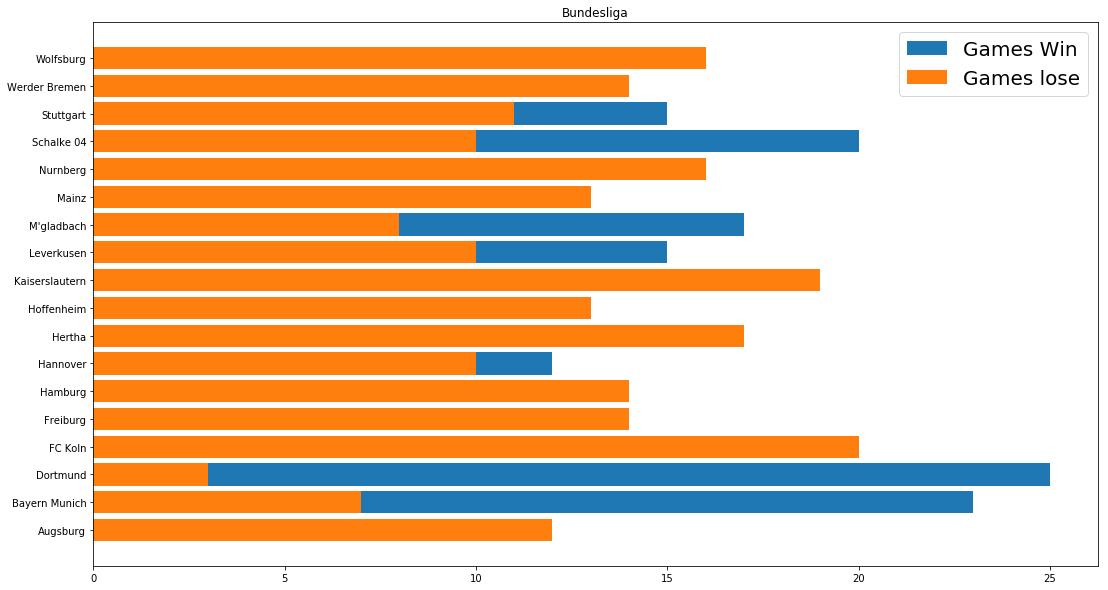

In [170]:
f, ax = plt.subplots(figsize=(18,10))
# plt.xticks(x, )
plt.barh(teams, winner_2011.sort_index(), label='Games Win')
plt.barh(teams, loser_2011.sort_index(), label='Games lose')
ax.set_title("Bundesliga")
ax.legend(fontsize = 20)

Text(0.5, 1.0, 'FC Koln')

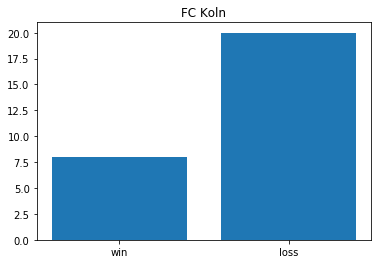

In [171]:
fig, axe = plt.subplots()

team = 'FC Koln'

axe.bar(['win', 'loss'], [winner_2011[team], loser_2011[team]])
axe.set_title(team)

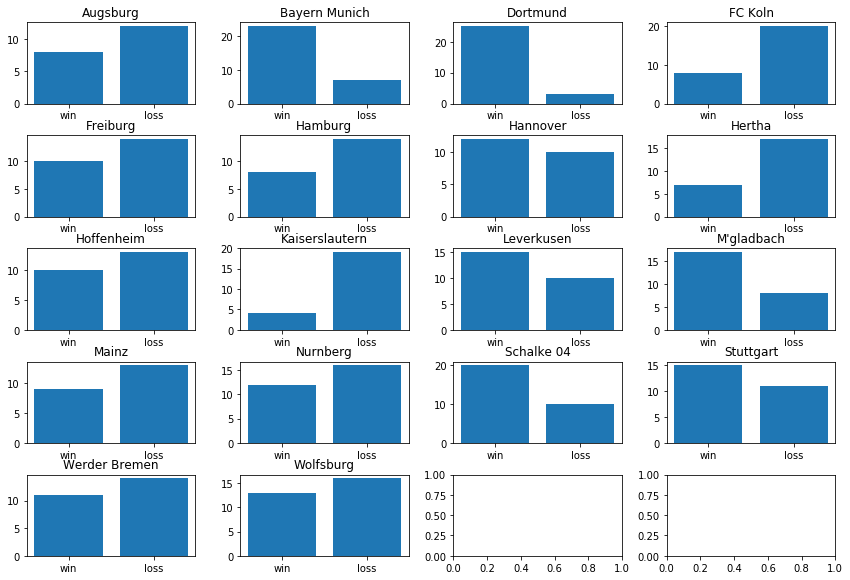

In [173]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(12,8))
plt.tight_layout()
axs = axes.flatten()
for i, team in enumerate(teams):
    ax = axs[i]
    ax.set_title(team)
    a = ax.bar(['win', 'loss'], [winner_2011[team], loser_2011[team]])


In [174]:
# fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(18, 8))

# df.set_index('wins').plot(kind='barh', ax=axes[0])
# axes[0].set_title('wins')

# df.set_index('losses').plot(kind='barh', ax=axes[1])
# axes[1].set_title('losses')

In [175]:
winner_2011['FC Koln']

8

In [176]:
# df = pd.DataFrame({'wins': winner_2011.sort_index().values,
#                    'losses': loser_2011.sort_index().values},
#                   index=winner_2011.index)

In [376]:
# df.plot(kind='bar', figsize=(15, 7))

In [179]:
df1 = pd.DataFrame({'GermanyTeam': teams, 'wins': winner_2011.sort_index().values,
                   'losses': loser_2011.sort_index().values},
                  )

In [180]:
df1

,GermanyTeam,wins,losses
0,Augsburg,8,12
1,Bayern Munich,23,7
2,Dortmund,25,3
3,FC Koln,8,20
4,Freiburg,10,14
5,Hamburg,8,14
6,Hannover,12,10
7,Hertha,7,17
8,Hoffenheim,10,13
9,Kaiserslautern,4,19


In [181]:
draw_teams = draw2011.index.sort_values()
draw_teams

Index(['Augsburg', 'Bayern Munich', 'Dortmund', 'FC Koln', 'Freiburg',
       'Hamburg', 'Hannover', 'Hertha', 'Hoffenheim', 'Leverkusen',
       'M'gladbach', 'Mainz', 'Schalke 04', 'Stuttgart', 'Werder Bremen',
       'Wolfsburg'],
      dtype='object')

In [182]:
draw2011_df = pd.DataFrame({'GermanyTeam': draw_teams, 'DrawGame': draw2011},)
draw2011_df

,GermanyTeam,DrawGame
Augsburg,Augsburg,6
Bayern Munich,Bayern Munich,4
Dortmund,Dortmund,6
FC Koln,FC Koln,6
Freiburg,Freiburg,3
Hamburg,Hamburg,4
Hannover,Hannover,1
Hertha,Hertha,6
Hoffenheim,Hoffenheim,8
Leverkusen,Leverkusen,8


In [183]:
df2 = pd.merge(df1, draw2011_df, on=['GermanyTeam'], how='outer')

In [367]:
df2

,GermanyTeam,wins,losses,DrawGame
0,Augsburg,8,12,6.0
1,Bayern Munich,23,7,4.0
2,Dortmund,25,3,6.0
3,FC Koln,8,20,6.0
4,Freiburg,10,14,3.0
5,Hamburg,8,14,4.0
6,Hannover,12,10,1.0
7,Hertha,7,17,6.0
8,Hoffenheim,10,13,8.0
9,Kaiserslautern,4,19,NaN


In [375]:
df2['ttl_gamePlayed'] = df2.sum(axis=1)
df2

,GermanyTeam,wins,losses,DrawGame,ttl_gamePlayed
0,Augsburg,8,12,6.0,26.0
1,Bayern Munich,23,7,4.0,34.0
2,Dortmund,25,3,6.0,34.0
3,FC Koln,8,20,6.0,34.0
4,Freiburg,10,14,3.0,27.0
5,Hamburg,8,14,4.0,26.0
6,Hannover,12,10,1.0,23.0
7,Hertha,7,17,6.0,30.0
8,Hoffenheim,10,13,8.0,31.0
9,Kaiserslautern,4,19,NaN,23.0


In [185]:
team_df = pd.DataFrame({'GermanyTeam': teams})

In [186]:
print(len(team_df))
team_df

18


,GermanyTeam
0,Augsburg
1,Bayern Munich
2,Dortmund
3,FC Koln
4,Freiburg
5,Hamburg
6,Hannover
7,Hertha
8,Hoffenheim
9,Kaiserslautern


In [187]:
goals_df = season2011.groupby('Unique_Team')['count_goal'].agg('sum').sort_values(ascending=False) 
goals_df

Unique_Team
Dortmund          80
Bayern Munich     77
Schalke 04        74
Stuttgart         63
Leverkusen        52
M'gladbach        49
Werder Bremen     49
Wolfsburg         47
Mainz             47
Freiburg          45
Hannover          41
Hoffenheim        41
FC Koln           39
Hertha            38
Nurnberg          38
Augsburg          36
Hamburg           35
Kaiserslautern    24
Name: count_goal, dtype: int64

In [188]:
goals_df1 = pd.DataFrame({'# of goals': goals_df})
goals_df1

,# of goals
Unique_Team,
Dortmund,80
Bayern Munich,77
Schalke 04,74
Stuttgart,63
Leverkusen,52
M'gladbach,49
Werder Bremen,49
Wolfsburg,47
Mainz,47


In [189]:
# DataFrame.duplicated(subset=None, keep='first')

In [190]:
season2011['Match_ID'].duplicated(subset='Match_ID', keep='first')

TypeError: duplicated() got an unexpected keyword argument 'subset'

In [191]:
season2011_df.shape

(306, 22)

In [192]:
whether_df.head()

,icon,time
0,rain,1312668000
1,partly-cloudy-day,1313186400
2,clear-day,1313791200
3,rain,1314396000
4,rain,1315605600


In [280]:
weather_df = whether_df

In [195]:
wheather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 2 columns):
icon    306 non-null object
time    306 non-null int64
dtypes: int64(1), object(1)
memory usage: 4.9+ KB


In [ ]:
# weather_df1 = wheather_df.rename(columns={'time':'New_date'})

In [282]:
weather_df.head()

,icon,time
0,rain,1312668000
1,partly-cloudy-day,1313186400
2,clear-day,1313791200
3,rain,1314396000
4,rain,1315605600


In [197]:
season2011_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306 entries, 204 to 8551
Data columns (total 22 columns):
Match_ID                  306 non-null int64
Unique_Team_ID            306 non-null int64
Unique_Team               306 non-null object
Div                       306 non-null object
Season                    306 non-null object
Date                      306 non-null object
HomeTeam                  306 non-null object
AwayTeam                  306 non-null object
FTHG                      306 non-null int64
FTAG                      306 non-null int64
FTR                       306 non-null object
KaderHome                 306 non-null object
AvgAgeHome                306 non-null object
ForeignPlayersHome        306 non-null object
OverallMarketValueHome    306 non-null object
AvgMarketValueHome        306 non-null object
StadiumCapacity           306 non-null object
count_goal                306 non-null int64
New_date                  306 non-null float64
WinnerInMatch         

In [199]:
season2011_df['New_date'] = season2011_df['New_date'].astype(int)

/anaconda3/envs/learn-env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [200]:
season2011_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306 entries, 204 to 8551
Data columns (total 22 columns):
Match_ID                  306 non-null int64
Unique_Team_ID            306 non-null int64
Unique_Team               306 non-null object
Div                       306 non-null object
Season                    306 non-null object
Date                      306 non-null object
HomeTeam                  306 non-null object
AwayTeam                  306 non-null object
FTHG                      306 non-null int64
FTAG                      306 non-null int64
FTR                       306 non-null object
KaderHome                 306 non-null object
AvgAgeHome                306 non-null object
ForeignPlayersHome        306 non-null object
OverallMarketValueHome    306 non-null object
AvgMarketValueHome        306 non-null object
StadiumCapacity           306 non-null object
count_goal                306 non-null int64
New_date                  306 non-null int64
WinnerInMatch           

In [283]:
wheather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 2 columns):
icon    306 non-null object
time    306 non-null int64
dtypes: int64(1), object(1)
memory usage: 4.9+ KB


In [302]:
# difference in timestamp. Getting discrepancy of 7200 
print(1312675200 - 1312668000)
print(1313193600 - 1313186400)

# sum 7200 in weather_df['time']
print(1312675200 - 1312675200)
print(1313798400 - 1313798400)

7200
7200
0
0


In [291]:
weather_df.head()

,icon,time
0,rain,1312668000
1,partly-cloudy-day,1313186400
2,clear-day,1313791200
3,rain,1314396000
4,rain,1315605600


In [272]:
# wheather_df = wheather_df.rename(columns={'New_date':'times'})


In [292]:
# sum 7200 in weather_df['time']
weather_df['New_date'] = (weather_df['time'] + 7200)

In [298]:
weather_df.head()

,icon,time,New_date
0,rain,1312668000,1312675200
1,partly-cloudy-day,1313186400,1313193600
2,clear-day,1313791200,1313798400
3,rain,1314396000,1314403200
4,rain,1315605600,1315612800


In [294]:
merged_df = season2011_df.merge(wheather_df1, on='New_date', how='left')
merged_df

,Match_ID,Unique_Team_ID,Unique_Team,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,...,OverallMarketValueHome,AvgMarketValueHome,StadiumCapacity,count_goal,New_date,WinnerInMatch,LoserInMatch,Draw,icon,time
0,1491,1,Bayern Munich,D1,2011,2011-08-07,Bayern Munich,M'gladbach,0,1,...,335600000,13980000,75000,0,1312675200,M'gladbach,Bayern Munich,None,rain,1.312668e+09
1,1491,1,Bayern Munich,D1,2011,2011-08-07,Bayern Munich,M'gladbach,0,1,...,335600000,13980000,75000,0,1312675200,M'gladbach,Bayern Munich,None,rain,1.312668e+09
2,1094,1,Bayern Munich,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,...,335600000,13980000,75000,1,1313193600,Bayern Munich,Wolfsburg,None,partly-cloudy-day,1.313186e+09
3,1094,1,Bayern Munich,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,...,335600000,13980000,75000,1,1313193600,Bayern Munich,Wolfsburg,None,partly-cloudy-day,1.313186e+09
4,1094,1,Bayern Munich,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,...,335600000,13980000,75000,1,1313193600,Bayern Munich,Wolfsburg,None,partly-cloudy-day,1.313186e+09
5,1094,1,Bayern Munich,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,...,335600000,13980000,75000,1,1313193600,Bayern Munich,Wolfsburg,None,partly-cloudy-day,1.313186e+09
6,1094,1,Bayern Munich,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,...,335600000,13980000,75000,1,1313193600,Bayern Munich,Wolfsburg,None,partly-cloudy-day,1.313186e+09
7,1094,1,Bayern Munich,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,...,335600000,13980000,75000,1,1313193600,Bayern Munich,Wolfsburg,None,partly-cloudy-day,1.313186e+09
8,1094,1,Bayern Munich,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,...,335600000,13980000,75000,1,1313193600,Bayern Munich,Wolfsburg,None,partly-cloudy-day,1.313186e+09
9,1211,1,Bayern Munich,D1,2011,2011-08-20,Bayern Munich,Hamburg,5,0,...,335600000,13980000,75000,5,1313798400,Bayern Munich,Hamburg,None,clear-day,1.313791e+09


In [296]:
merged_df.shape

(986, 24)

In [299]:
merged_df = merged_df.drop_duplicates(subset='Match_ID', keep="first")

In [300]:
merged_df.shape

(306, 24)

In [301]:
merged_df

,Match_ID,Unique_Team_ID,Unique_Team,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,...,OverallMarketValueHome,AvgMarketValueHome,StadiumCapacity,count_goal,New_date,WinnerInMatch,LoserInMatch,Draw,icon,time
0,1491,1,Bayern Munich,D1,2011,2011-08-07,Bayern Munich,M'gladbach,0,1,...,335600000,13980000,75000,0,1312675200,M'gladbach,Bayern Munich,None,rain,1.312668e+09
2,1094,1,Bayern Munich,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,...,335600000,13980000,75000,1,1313193600,Bayern Munich,Wolfsburg,None,partly-cloudy-day,1.313186e+09
9,1211,1,Bayern Munich,D1,2011,2011-08-20,Bayern Munich,Hamburg,5,0,...,335600000,13980000,75000,5,1313798400,Bayern Munich,Hamburg,None,clear-day,1.313791e+09
15,1104,1,Bayern Munich,D1,2011,2011-08-27,Kaiserslautern,Bayern Munich,0,3,...,335600000,13980000,75000,3,1314403200,Bayern Munich,Kaiserslautern,None,rain,1.314396e+09
21,1197,1,Bayern Munich,D1,2011,2011-09-10,Bayern Munich,Freiburg,7,0,...,335600000,13980000,75000,7,1315612800,Bayern Munich,Freiburg,None,rain,1.315606e+09
27,1100,1,Bayern Munich,D1,2011,2011-09-18,Schalke 04,Bayern Munich,0,2,...,335600000,13980000,75000,2,1316304000,Bayern Munich,Schalke 04,None,rain,1.316297e+09
29,1262,1,Bayern Munich,D1,2011,2011-09-24,Bayern Munich,Leverkusen,3,0,...,335600000,13980000,75000,3,1316822400,Bayern Munich,Leverkusen,None,clear-day,1.316815e+09
35,1102,1,Bayern Munich,D1,2011,2011-10-01,Hoffenheim,Bayern Munich,0,0,...,335600000,13980000,75000,0,1317427200,None,None,Bayern Munich,clear-day,1.317420e+09
41,1401,1,Bayern Munich,D1,2011,2011-10-15,Bayern Munich,Hertha,4,0,...,335600000,13980000,75000,4,1318636800,Bayern Munich,Hertha,None,clear-day,1.318630e+09
47,1101,1,Bayern Munich,D1,2011,2011-10-23,Hannover,Bayern Munich,2,1,...,335600000,13980000,75000,1,1319328000,Hannover,Bayern Munich,None,rain,1.319321e+09


In [304]:
def rain(record):
    if record['icon'] == "rain":
        if record['FTHG'] > record['FTAG']:
            return record['HomeTeam']
        else:
            return record['AwayTeam']


In [305]:
merged_df['WinningTeam_Rain'] = merged_df.apply(rain, axis=1)

/anaconda3/envs/learn-env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [313]:
merged_df.head(10)

,Match_ID,Unique_Team_ID,Unique_Team,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,...,AvgMarketValueHome,StadiumCapacity,count_goal,New_date,WinnerInMatch,LoserInMatch,Draw,icon,time,WinningTeam_Rain
0,1491,1,Bayern Munich,D1,2011,2011-08-07,Bayern Munich,M'gladbach,0,1,...,13980000,75000,0,1312675200,M'gladbach,Bayern Munich,None,rain,1.312668e+09,M'gladbach
2,1094,1,Bayern Munich,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,...,13980000,75000,1,1313193600,Bayern Munich,Wolfsburg,None,partly-cloudy-day,1.313186e+09,None
9,1211,1,Bayern Munich,D1,2011,2011-08-20,Bayern Munich,Hamburg,5,0,...,13980000,75000,5,1313798400,Bayern Munich,Hamburg,None,clear-day,1.313791e+09,None
15,1104,1,Bayern Munich,D1,2011,2011-08-27,Kaiserslautern,Bayern Munich,0,3,...,13980000,75000,3,1314403200,Bayern Munich,Kaiserslautern,None,rain,1.314396e+09,Bayern Munich
21,1197,1,Bayern Munich,D1,2011,2011-09-10,Bayern Munich,Freiburg,7,0,...,13980000,75000,7,1315612800,Bayern Munich,Freiburg,None,rain,1.315606e+09,Bayern Munich
27,1100,1,Bayern Munich,D1,2011,2011-09-18,Schalke 04,Bayern Munich,0,2,...,13980000,75000,2,1316304000,Bayern Munich,Schalke 04,None,rain,1.316297e+09,Bayern Munich
29,1262,1,Bayern Munich,D1,2011,2011-09-24,Bayern Munich,Leverkusen,3,0,...,13980000,75000,3,1316822400,Bayern Munich,Leverkusen,None,clear-day,1.316815e+09,None
35,1102,1,Bayern Munich,D1,2011,2011-10-01,Hoffenheim,Bayern Munich,0,0,...,13980000,75000,0,1317427200,None,None,Bayern Munich,clear-day,1.317420e+09,None
41,1401,1,Bayern Munich,D1,2011,2011-10-15,Bayern Munich,Hertha,4,0,...,13980000,75000,4,1318636800,Bayern Munich,Hertha,None,clear-day,1.318630e+09,None
47,1101,1,Bayern Munich,D1,2011,2011-10-23,Hannover,Bayern Munich,2,1,...,13980000,75000,1,1319328000,Hannover,Bayern Munich,None,rain,1.319321e+09,Hannover


In [323]:
TotalWinInRain = merged_df.WinningTeam_Rain.value_counts()
print(len(TotalWinInRain))
TotalWinInRain

18


Bayern Munich     5
Hannover          4
M'gladbach        4
Freiburg          3
Leverkusen        3
Werder Bremen     3
Dortmund          3
Hertha            3
Stuttgart         3
FC Koln           3
Nurnberg          3
Wolfsburg         3
Augsburg          3
Mainz             2
Hamburg           2
Schalke 04        2
Kaiserslautern    1
Hoffenheim        1
Name: WinningTeam_Rain, dtype: int64

In [351]:
#find the total number of rain days each team played
def rain_played(record):
    if record['icon'] == "rain":
        if record['Unique_Team'] == record['WinningTeam_Rain']:
            return record['HomeTeam']
        else:
            return record['AwayTeam']

In [340]:
merged_df['rain'] = merged_df.apply(rain_played, axis=1)

/anaconda3/envs/learn-env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [354]:
merged_df.loc[merged_df['icon']=="rain"]

,Match_ID,Unique_Team_ID,Unique_Team,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,...,StadiumCapacity,count_goal,New_date,WinnerInMatch,LoserInMatch,Draw,icon,time,WinningTeam_Rain,rain
0,1491,1,Bayern Munich,D1,2011,2011-08-07,Bayern Munich,M'gladbach,0,1,...,75000,0,1312675200,M'gladbach,Bayern Munich,None,rain,1.312668e+09,M'gladbach,Bayern Munich
15,1104,1,Bayern Munich,D1,2011,2011-08-27,Kaiserslautern,Bayern Munich,0,3,...,75000,3,1314403200,Bayern Munich,Kaiserslautern,None,rain,1.314396e+09,Bayern Munich,Bayern Munich
21,1197,1,Bayern Munich,D1,2011,2011-09-10,Bayern Munich,Freiburg,7,0,...,75000,7,1315612800,Bayern Munich,Freiburg,None,rain,1.315606e+09,Bayern Munich,Bayern Munich
27,1100,1,Bayern Munich,D1,2011,2011-09-18,Schalke 04,Bayern Munich,0,2,...,75000,2,1316304000,Bayern Munich,Schalke 04,None,rain,1.316297e+09,Bayern Munich,Bayern Munich
47,1101,1,Bayern Munich,D1,2011,2011-10-23,Hannover,Bayern Munich,2,1,...,75000,1,1319328000,Hannover,Bayern Munich,None,rain,1.319321e+09,Hannover,Bayern Munich
71,1092,1,Bayern Munich,D1,2011,2012-03-31,Nurnberg,Bayern Munich,0,1,...,75000,1,1333152000,Bayern Munich,Nurnberg,None,rain,1.333145e+09,Bayern Munich,Bayern Munich
110,1107,1,Bayern Munich,D1,2011,2012-05-05,FC Koln,Bayern Munich,1,4,...,75000,4,1336176000,Bayern Munich,FC Koln,None,rain,1.336169e+09,Bayern Munich,Bayern Munich
119,1219,2,Dortmund,D1,2011,2011-08-05,Dortmund,Hamburg,3,1,...,81359,3,1312502400,Dortmund,Hamburg,None,rain,1.312495e+09,Dortmund,Dortmund
133,1109,2,Dortmund,D1,2011,2011-08-27,Leverkusen,Dortmund,0,0,...,81359,0,1314403200,None,None,Dortmund,rain,1.314396e+09,Dortmund,Dortmund
139,1407,2,Dortmund,D1,2011,2011-09-10,Dortmund,Hertha,1,2,...,81359,1,1315612800,Hertha,Dortmund,None,rain,1.315606e+09,Hertha,Dortmund


In [327]:
merged_df.loc[merged_df['Unique_Team']=="Stuttgart"]

,Match_ID,Unique_Team_ID,Unique_Team,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,...,StadiumCapacity,count_goal,New_date,WinnerInMatch,LoserInMatch,Draw,icon,time,WinningTeam_Rain,rain
945,1379,17,Stuttgart,D1,2011,2011-09-10,Stuttgart,Hannover,3,0,...,60449,3,1315612800,Stuttgart,Hannover,None,rain,1.315606e+09,Stuttgart,Stuttgart
951,1319,17,Stuttgart,D1,2011,2011-09-30,Kaiserslautern,Stuttgart,0,2,...,60449,2,1317340800,Stuttgart,Kaiserslautern,None,clear-day,1.317334e+09,None,None
952,1320,17,Stuttgart,D1,2011,2011-10-22,Nurnberg,Stuttgart,2,2,...,60449,2,1319241600,None,None,Stuttgart,clear-day,1.319234e+09,None,None
958,1326,17,Stuttgart,D1,2011,2012-02-19,Hannover,Stuttgart,4,2,...,60449,2,1329609600,Hannover,Stuttgart,None,NaN,NaN,None,None
959,1241,17,Stuttgart,D1,2011,2012-03-09,Stuttgart,Kaiserslautern,0,0,...,60449,0,1331251200,None,None,Stuttgart,NaN,NaN,None,None
960,1287,17,Stuttgart,D1,2011,2012-03-25,Stuttgart,Nurnberg,1,0,...,60449,1,1332633600,Stuttgart,Nurnberg,None,NaN,NaN,None,None


In [328]:
merged_df.loc[merged_df['WinningTeam_Rain']=="Stuttgart"]

,Match_ID,Unique_Team_ID,Unique_Team,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,...,StadiumCapacity,count_goal,New_date,WinnerInMatch,LoserInMatch,Draw,icon,time,WinningTeam_Rain,rain
314,1311,5,Schalke 04,D1,2011,2011-08-06,Stuttgart,Schalke 04,3,0,...,62271,0,1312588800,Stuttgart,Schalke 04,None,rain,1.312582e+09,Stuttgart,Schalke 04
564,1474,7,Wolfsburg,D1,2011,2012-05-05,Stuttgart,Wolfsburg,3,2,...,30000,2,1336176000,Stuttgart,Wolfsburg,None,rain,1.336169e+09,Stuttgart,Wolfsburg
945,1379,17,Stuttgart,D1,2011,2011-09-10,Stuttgart,Hannover,3,0,...,60449,3,1315612800,Stuttgart,Hannover,None,rain,1.315606e+09,Stuttgart,Stuttgart


In [364]:
season2011['Unique_Team'].value_counts()

Schalke 04        34
Leverkusen        34
Bayern Munich     34
Werder Bremen     34
Dortmund          34
Hannover          34
M'gladbach        34
Freiburg          34
FC Koln           34
Nurnberg          34
Kaiserslautern    34
Hoffenheim        34
Wolfsburg         34
Hertha            34
Mainz             34
Augsburg          34
Hamburg           34
Stuttgart         34
Name: Unique_Team, dtype: int64

In [365]:
season2011_df['Unique_Team'].value_counts()

Bayern Munich    34
Dortmund         32
Leverkusen       30
Schalke 04       28
M'gladbach       26
Wolfsburg        24
FC Koln          22
Hoffenheim       20
Hertha           18
Mainz            16
Hamburg          14
Werder Bremen    12
Augsburg         10
Freiburg          8
Stuttgart         6
Hannover          4
Nurnberg          2
Name: Unique_Team, dtype: int64

In [361]:
merged_df.loc[merged_df['Unique_Team']=="Stuttgart"]

,Match_ID,Unique_Team_ID,Unique_Team,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,...,StadiumCapacity,count_goal,New_date,WinnerInMatch,LoserInMatch,Draw,icon,time,WinningTeam_Rain,rain
945,1379,17,Stuttgart,D1,2011,2011-09-10,Stuttgart,Hannover,3,0,...,60449,3,1315612800,Stuttgart,Hannover,None,rain,1.315606e+09,Stuttgart,Stuttgart
951,1319,17,Stuttgart,D1,2011,2011-09-30,Kaiserslautern,Stuttgart,0,2,...,60449,2,1317340800,Stuttgart,Kaiserslautern,None,clear-day,1.317334e+09,None,None
952,1320,17,Stuttgart,D1,2011,2011-10-22,Nurnberg,Stuttgart,2,2,...,60449,2,1319241600,None,None,Stuttgart,clear-day,1.319234e+09,None,None
958,1326,17,Stuttgart,D1,2011,2012-02-19,Hannover,Stuttgart,4,2,...,60449,2,1329609600,Hannover,Stuttgart,None,NaN,NaN,None,None
959,1241,17,Stuttgart,D1,2011,2012-03-09,Stuttgart,Kaiserslautern,0,0,...,60449,0,1331251200,None,None,Stuttgart,NaN,NaN,None,None
960,1287,17,Stuttgart,D1,2011,2012-03-25,Stuttgart,Nurnberg,1,0,...,60449,1,1332633600,Stuttgart,Nurnberg,None,NaN,NaN,None,None


In [359]:
print(len(merged_df.loc[merged_df['HomeTeam']=="Stuttgart"]))
print(len(merged_df.loc[merged_df['AwayTeam']=="Stuttgart"]))

17
17


In [332]:
merged_df.loc[merged_df['Unique_Team']!= merged_df['HomeTeam']]

,Match_ID,Unique_Team_ID,Unique_Team,Div,Season,Date,HomeTeam,AwayTeam,FTHG,FTAG,...,StadiumCapacity,count_goal,New_date,WinnerInMatch,LoserInMatch,Draw,icon,time,WinningTeam_Rain,rain
2,1094,1,Bayern Munich,D1,2011,2011-08-13,Wolfsburg,Bayern Munich,0,1,...,75000,1,1313193600,Bayern Munich,Wolfsburg,None,partly-cloudy-day,1.313186e+09,None,None
15,1104,1,Bayern Munich,D1,2011,2011-08-27,Kaiserslautern,Bayern Munich,0,3,...,75000,3,1314403200,Bayern Munich,Kaiserslautern,None,rain,1.314396e+09,Bayern Munich,Bayern Munich
27,1100,1,Bayern Munich,D1,2011,2011-09-18,Schalke 04,Bayern Munich,0,2,...,75000,2,1316304000,Bayern Munich,Schalke 04,None,rain,1.316297e+09,Bayern Munich,Bayern Munich
35,1102,1,Bayern Munich,D1,2011,2011-10-01,Hoffenheim,Bayern Munich,0,0,...,75000,0,1317427200,None,None,Bayern Munich,clear-day,1.317420e+09,None,None
47,1101,1,Bayern Munich,D1,2011,2011-10-23,Hannover,Bayern Munich,2,1,...,75000,1,1319328000,Hannover,Bayern Munich,None,rain,1.319321e+09,Hannover,Bayern Munich
55,1106,1,Bayern Munich,D1,2011,2011-11-06,Augsburg,Bayern Munich,1,2,...,75000,2,1320537600,Bayern Munich,Augsburg,None,NaN,NaN,None,None
57,1095,1,Bayern Munich,D1,2011,2011-11-27,Mainz,Bayern Munich,3,2,...,75000,2,1322352000,Mainz,Bayern Munich,None,NaN,NaN,None,None
59,1093,1,Bayern Munich,D1,2011,2011-12-11,Stuttgart,Bayern Munich,1,2,...,75000,2,1323561600,Bayern Munich,Stuttgart,None,NaN,NaN,None,None
61,1097,1,Bayern Munich,D1,2011,2012-01-20,M'gladbach,Bayern Munich,3,1,...,75000,1,1327017600,M'gladbach,Bayern Munich,None,NaN,NaN,None,None
63,1098,1,Bayern Munich,D1,2011,2012-02-04,Hamburg,Bayern Munich,1,1,...,75000,1,1328313600,None,None,Bayern Munich,NaN,NaN,None,None


In [347]:
GamePlayedInRain= merged_df.rain.value_counts()
print(len(GamePlayedInRain))
print(sum(GamePlayedInRain))
GamePlayedInRain

15
51


Bayern Munich    7
Leverkusen       6
Hamburg          5
FC Koln          5
Dortmund         5
Wolfsburg        4
Hoffenheim       4
Schalke 04       3
Augsburg         3
M'gladbach       3
Hertha           2
Mainz            1
Hannover         1
Werder Bremen    1
Stuttgart        1
Name: rain, dtype: int64

In [350]:
print(sum(TotalWinInRain))
TotalWinInRain

51


Bayern Munich     5
Hannover          4
M'gladbach        4
Freiburg          3
Leverkusen        3
Werder Bremen     3
Dortmund          3
Hertha            3
Stuttgart         3
FC Koln           3
Nurnberg          3
Wolfsburg         3
Augsburg          3
Mainz             2
Hamburg           2
Schalke 04        2
Kaiserslautern    1
Hoffenheim        1
Name: WinningTeam_Rain, dtype: int64

In [ ]:
rain_stats = pd.DataFrame({'GermanyTeam': teams, 'wins': TotalWinInRain.sort_index().values,
                   'losses': loser_2011.sort_index().values},
                  )